# URL study

## Import

In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../4_URL_study')
import url_util as ut
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['user_screen_name','urls','created_at'])

In [3]:
df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")

In [4]:
df_novax = pd.read_csv('tweets_novax_100.csv',low_memory=False, usecols=['user_screen_name','urls','created_at'])
df_provax = pd.read_csv('tweets_novax_100.csv',low_memory=False, usecols=['user_screen_name','urls','created_at'])

## Novax study

### Visualizaiton by histogram

In [5]:
dfUrls_novax = ut.df_url_counter(df_novax)
dfUrls_novax = ut.url_credibility('../1_Dataset_preparation/data/credibility.csv',dfUrls_novax)
dfUrls_novax 

,count,Class
url,,
twitter.com,33316,none
youtube.com,5594,none
imolaoggi.it,4708,low
iltempo.it,1513,high
rumble.com,1089,none
...,...,...
astrazeneca.com,1,none
toutsurmesfinances.com,1,none
assisioggi.it,1,none


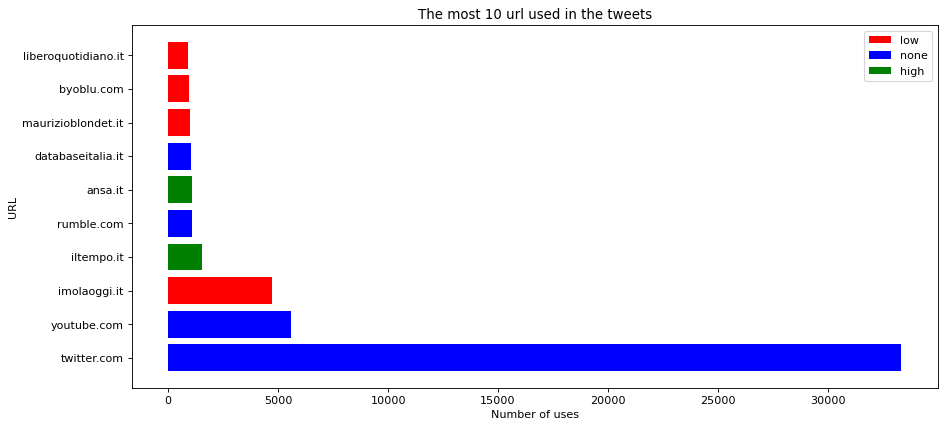

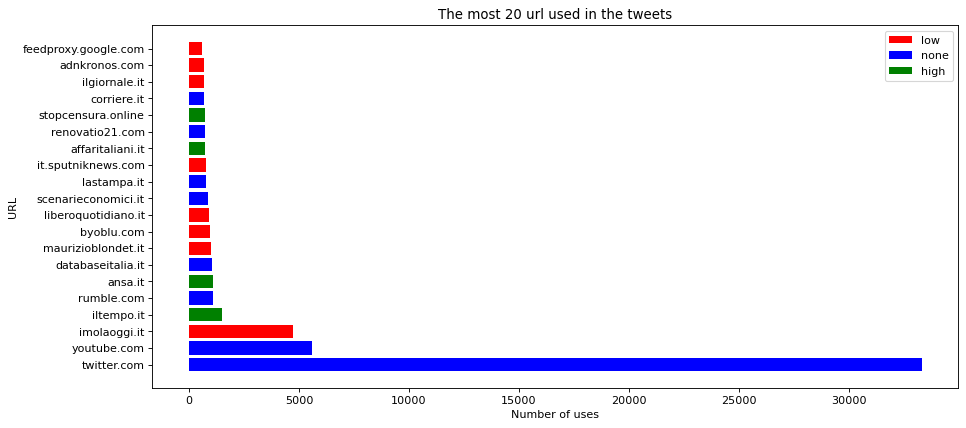

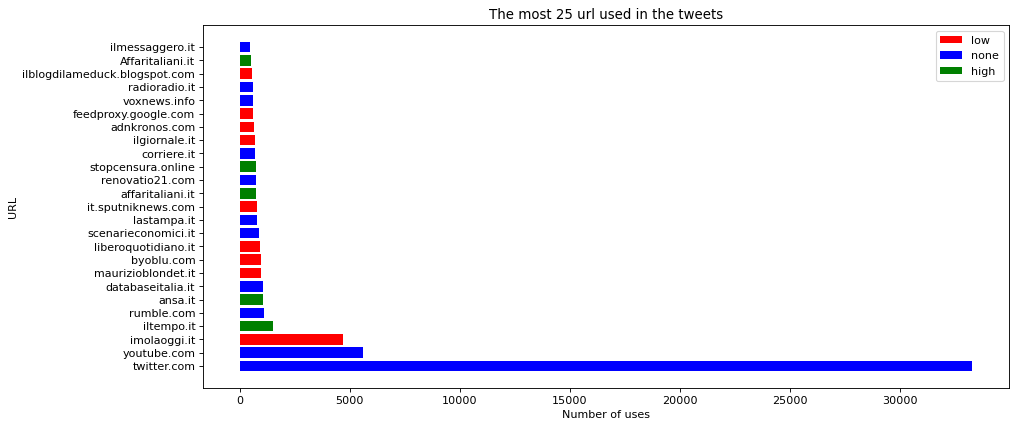

In [6]:
colors = {'low': 'r', 'none': 'b', 'high': 'g'}

for i in (10,20,25): 
    if i < 30:
        figure(figsize=(13, 6), dpi=80)
    else:
        figure(figsize=(13, 12), dpi=80)
    
    for n,c in colors.items():
        plt.hist([0],color=c,label=n)
    
    plt.barh(dfUrls_novax.head(i).index,
             width=dfUrls_novax.head(i)['count'], color=[colors[i] for i in dfUrls_novax.head(10)['Class']])
    plt.legend()

    plt.xlabel('Number of uses')
    plt.ylabel('URL')
    plt.title("The most %d url used in the tweets"% i)
    plt.show()

### Visualizaiton by date

In [7]:
dfUseUrl_novax = ut.process_dfUse(df)
dfUseUrl_novax

,Week/Year,url,count
62201,2020-01-06,rainews.it,17
62195,2020-01-06,playhitmusic.it,1
62196,2020-01-06,pokodemim.blogspot.com,1
62197,2020-01-06,quotidianosanita.it,1
62198,2020-01-06,radiolombardia.it,1
...,...,...,...
9524,2021-05-17,orizzontescuola.it,9
9525,2021-05-17,orizzontinternazionali.org,1
9526,2021-05-17,orvieto24.it,1
9528,2021-05-17,ossolanews.it,1


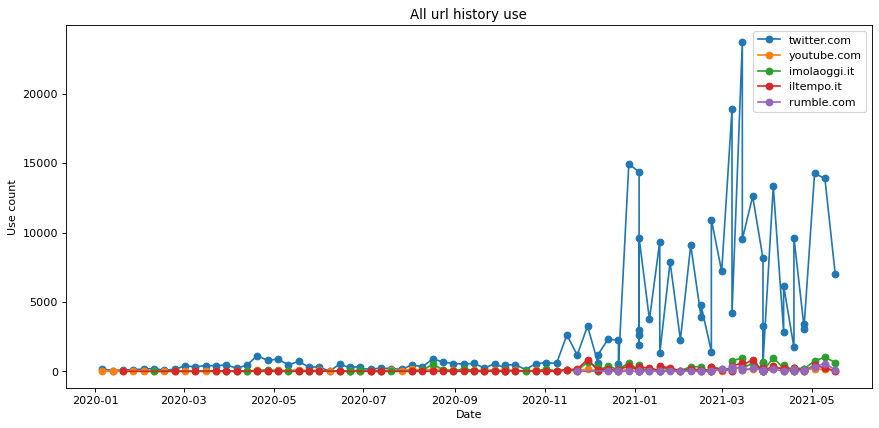

In [8]:
figure(figsize=(13, 6), dpi=80)

for w in dfUrls_novax.head().index:
    mask = dfUseUrl_novax['url'] == w
    plt.plot(dfUseUrl_novax.loc[mask,'Week/Year'],dfUseUrl_novax.loc[mask,'count'],'o-',label=w)

plt.legend()   
plt.title('All url history use')
plt.xlabel('Date')
plt.ylabel('Use count')

plt.show()

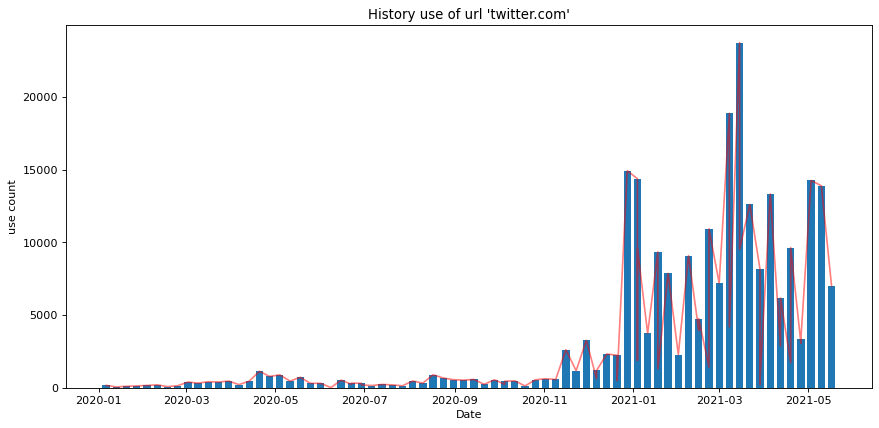

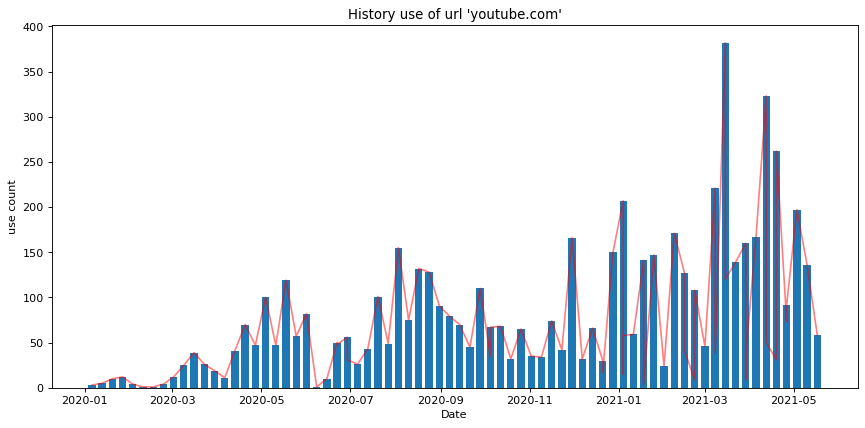

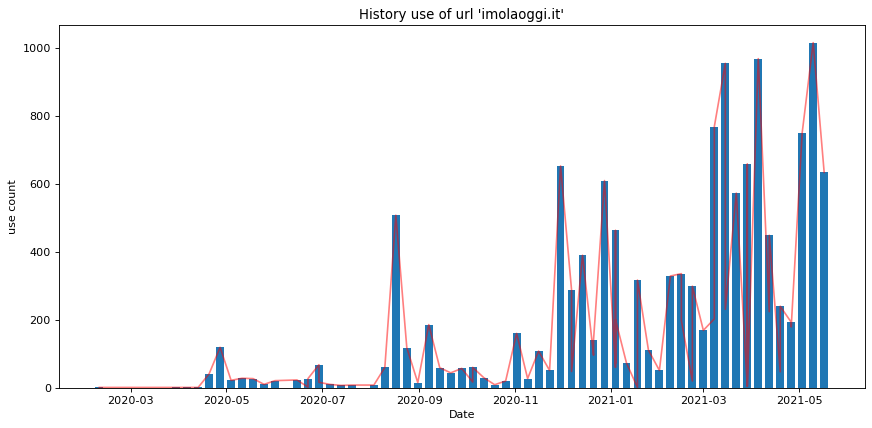

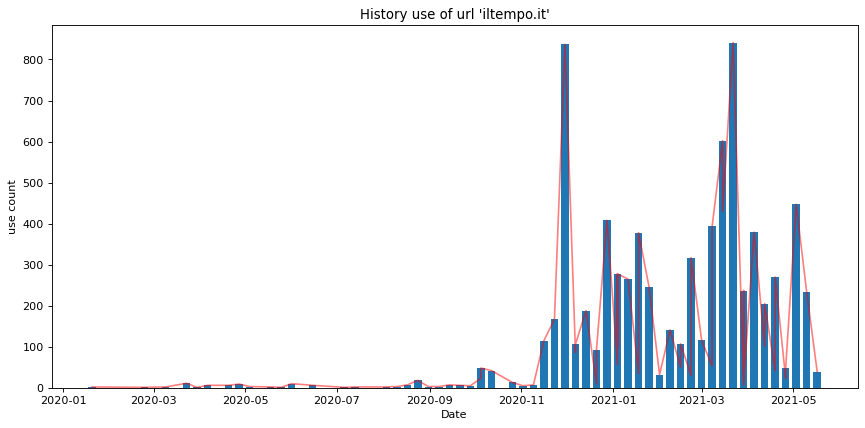

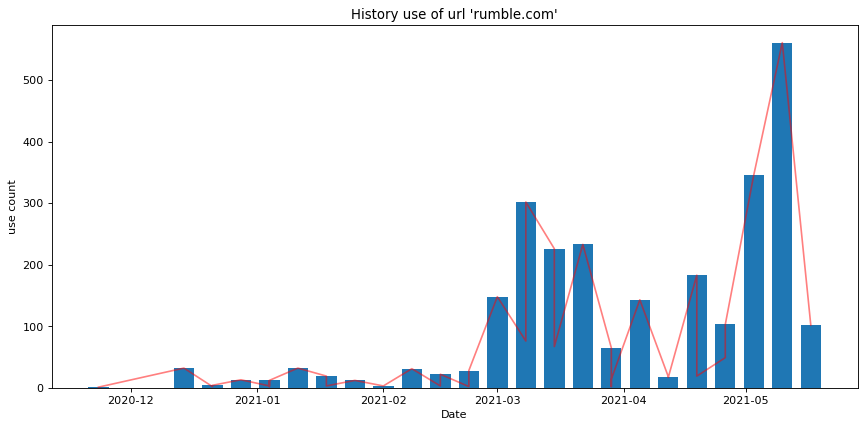

In [9]:
#All in different graphic
for w in dfUrls_novax.head().index:
    mask = dfUseUrl_novax['url'] == w
    figure(figsize=(13, 6), dpi=80)
    
    plt.bar(dfUseUrl_novax.loc[mask,'Week/Year'],height=dfUseUrl_novax.loc[mask,'count'],width=5)
    plt.plot(dfUseUrl_novax.loc[mask,'Week/Year'],dfUseUrl_novax.loc[mask,'count'],color='r',alpha = 0.5)
    
    plt.title("History use of url '%s'"%w)
    plt.xlabel('Date')
    plt.ylabel('use count')

    plt.show()

## Provax study

### Visualizaiton by histogram

In [10]:
dfUrls_provax = ut.df_url_counter(df_provax)
dfUrls_provax = ut.url_credibility('../1_Dataset_preparation/data/credibility.csv',dfUrls_provax)
dfUrls_provax 

,count,Class
url,,
twitter.com,33316,none
youtube.com,5594,none
imolaoggi.it,4708,low
iltempo.it,1513,high
rumble.com,1089,none
...,...,...
astrazeneca.com,1,none
toutsurmesfinances.com,1,none
assisioggi.it,1,none


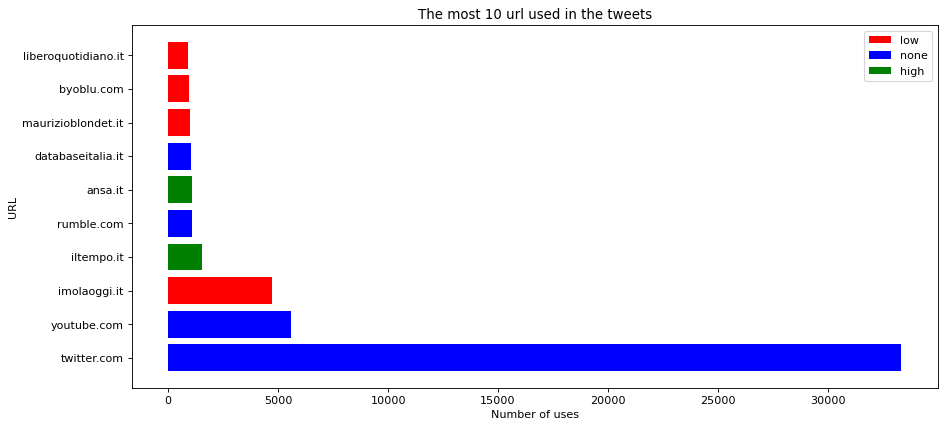

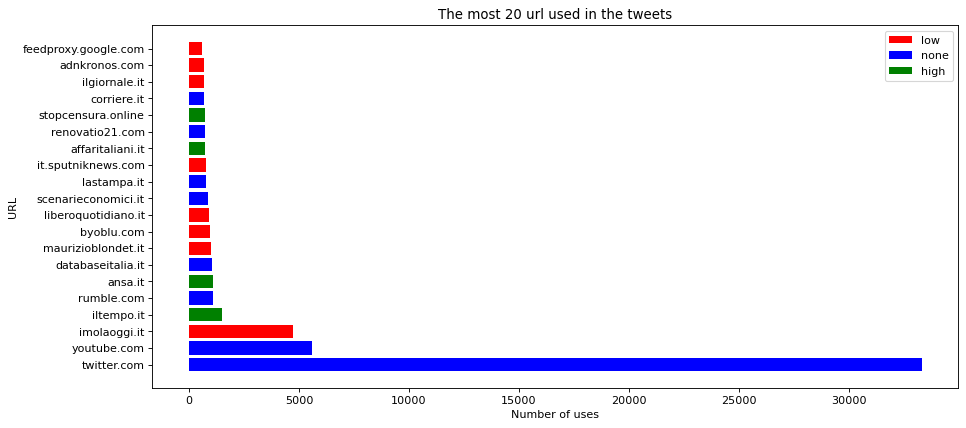

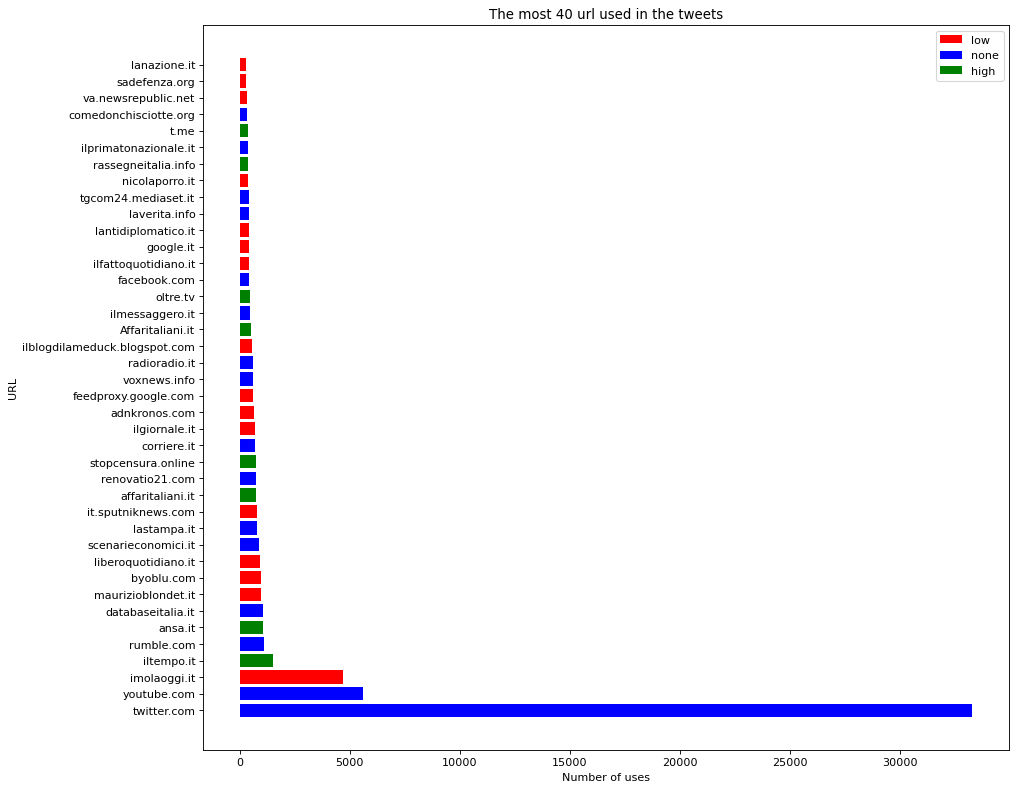

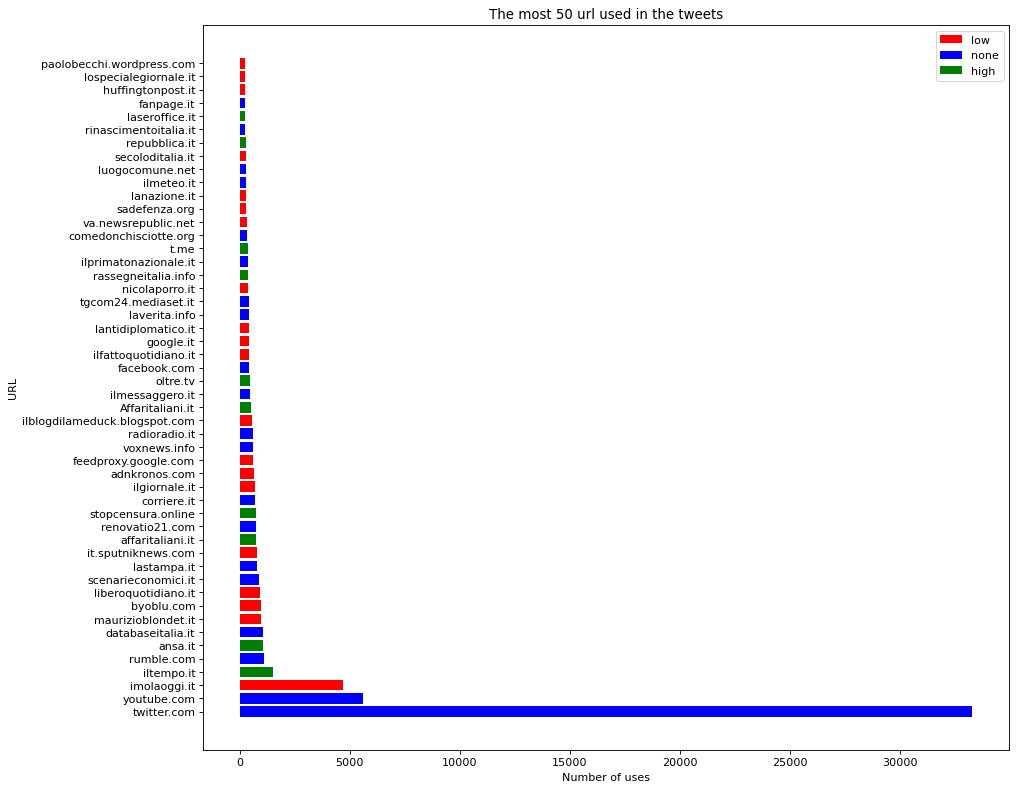

In [11]:
colors = {'low': 'r', 'none': 'b', 'high': 'g'}

for i in (10,20,40,50): 
    if i < 30:
        figure(figsize=(13, 6), dpi=80)
    else:
        figure(figsize=(13, 12), dpi=80)
    
    for n,c in colors.items():
        plt.hist([0],color=c,label=n)
    
    plt.barh(dfUrls_provax.head(i).index,
             width=dfUrls_provax.head(i)['count'], color=[colors[i] for i in dfUrls_provax.head(10)['Class']])
    plt.legend()

    plt.xlabel('Number of uses')
    plt.ylabel('URL')
    plt.title("The most %d url used in the tweets"% i)
    plt.show()

### Visualizaiton by date

In [12]:
dfUseUrl_provax = ut.process_dfUse(df)
dfUseUrl_provax

,Week/Year,url,count
62201,2020-01-06,rainews.it,17
62195,2020-01-06,playhitmusic.it,1
62196,2020-01-06,pokodemim.blogspot.com,1
62197,2020-01-06,quotidianosanita.it,1
62198,2020-01-06,radiolombardia.it,1
...,...,...,...
9524,2021-05-17,orizzontescuola.it,9
9525,2021-05-17,orizzontinternazionali.org,1
9526,2021-05-17,orvieto24.it,1
9528,2021-05-17,ossolanews.it,1


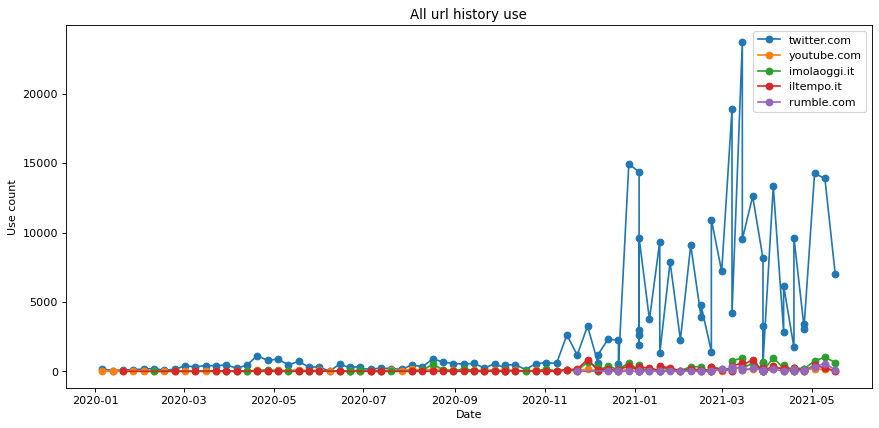

In [13]:
figure(figsize=(13, 6), dpi=80)

for w in dfUrls_provax.head().index:
    mask = dfUseUrl_provax['url'] == w
    plt.plot(dfUseUrl_provax.loc[mask,'Week/Year'],dfUseUrl_provax.loc[mask,'count'],'o-',label=w)

plt.legend()   
plt.title('All url history use')
plt.xlabel('Date')
plt.ylabel('Use count')

plt.show()

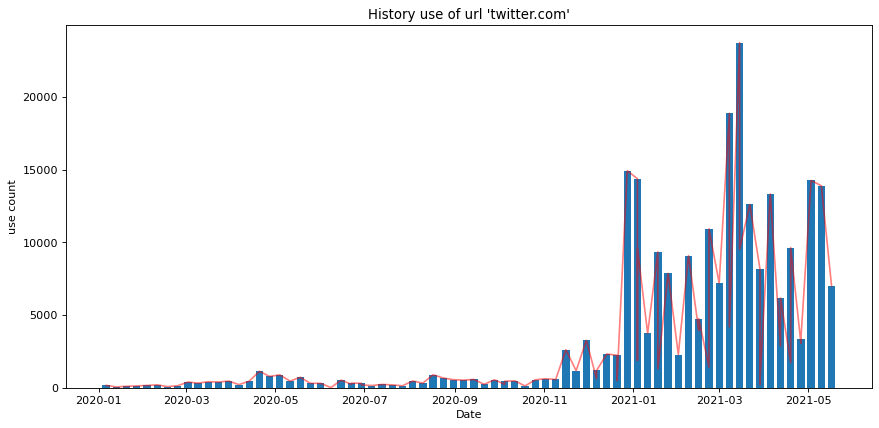

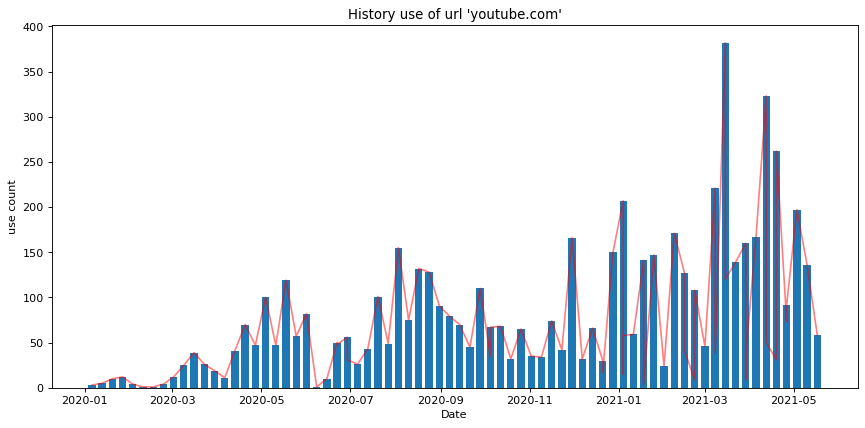

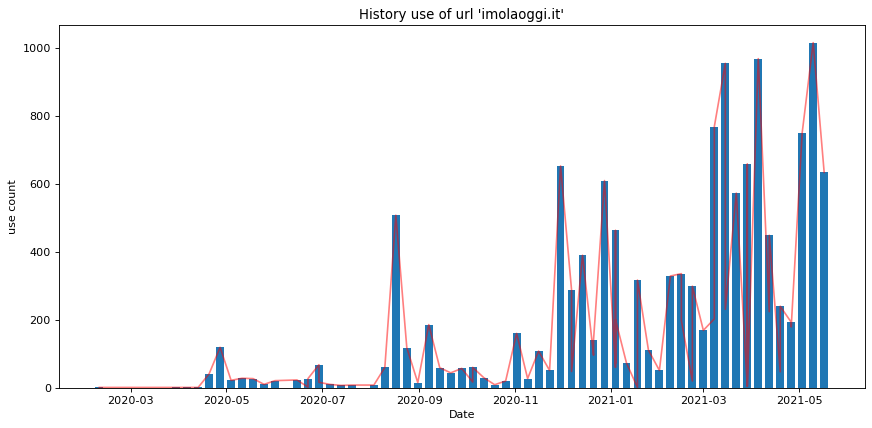

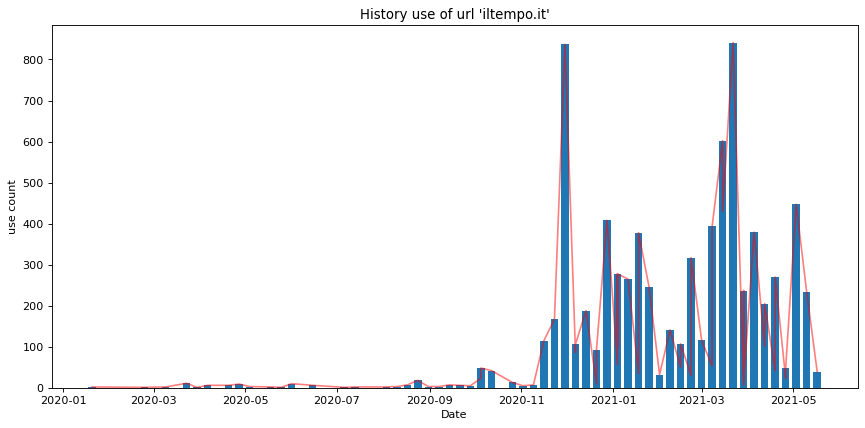

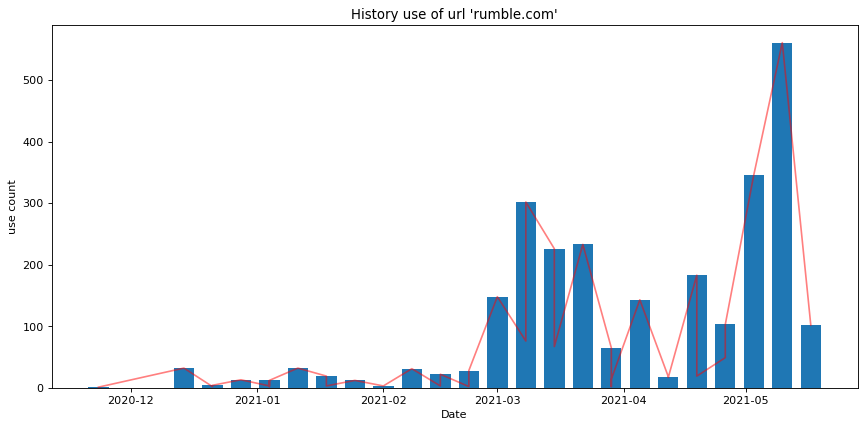

In [14]:
#All in different graphic
for w in dfUrls_provax.head().index:
    mask = dfUseUrl_novax['url'] == w
    figure(figsize=(13, 6), dpi=80)
    
    plt.bar(dfUseUrl_provax.loc[mask,'Week/Year'],height=dfUseUrl_provax.loc[mask,'count'],width=5)
    plt.plot(dfUseUrl_provax.loc[mask,'Week/Year'],dfUseUrl_provax.loc[mask,'count'],color='r',alpha = 0.5)
    
    plt.title("History use of url '%s'"%w)
    plt.xlabel('Date')
    plt.ylabel('use count')

    plt.show()